# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazovsky
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | coahuayana de hidalgo
Processing Record 4 of Set 1 | klyuchi
Processing Record 5 of Set 1 | cove
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | jayapura
Processing Record 8 of Set 1 | isla del bosque
Processing Record 9 of Set 1 | rincon
Processing Record 10 of Set 1 | maine soroa
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | garachico
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | longford
Processing Record 16 of Set 1 | tazacorte
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | camiri
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | becha

Processing Record 42 of Set 4 | mahdia
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | tongchuanshi
Processing Record 45 of Set 4 | bac lieu
Processing Record 46 of Set 4 | labrador city
Processing Record 47 of Set 4 | dingwall
Processing Record 48 of Set 4 | al wakrah
Processing Record 49 of Set 4 | dudinka
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | ketchikan
Processing Record 2 of Set 5 | medina
Processing Record 3 of Set 5 | delice
Processing Record 4 of Set 5 | uturoa
Processing Record 5 of Set 5 | dogansehir
Processing Record 6 of Set 5 | vernon
Processing Record 7 of Set 5 | tataouine
Processing Record 8 of Set 5 | dapa
Processing Record 9 of Set 5 | warmbaths
Processing Record 10 of Set 5 | igra
Processing Record 11 of Set 5 | plastun
Processing Record 12 of Set 5 | evansville
Processing Record 13 of Set 5 | ust-nera
Processing Record 14 of Set 5 | greater upper marlboro
City not found. Skipping...
Processing Record 15 of Set 5 | vi

Processing Record 34 of Set 8 | chhor
Processing Record 35 of Set 8 | quellon
Processing Record 36 of Set 8 | vilhena
Processing Record 37 of Set 8 | sao gabriel
Processing Record 38 of Set 8 | tateyama
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | bei'an
Processing Record 41 of Set 8 | saipan
Processing Record 42 of Set 8 | puerto deseado
Processing Record 43 of Set 8 | nar'yan-mar
Processing Record 44 of Set 8 | prince rupert
Processing Record 45 of Set 8 | cloverdale
Processing Record 46 of Set 8 | acapulco de juarez
Processing Record 47 of Set 8 | parapat
Processing Record 48 of Set 8 | katsuren-haebaru
Processing Record 49 of Set 8 | reggane
Processing Record 0 of Set 9 | jianguang
Processing Record 1 of Set 9 | mili
Processing Record 2 of Set 9 | chunar
Processing Record 3 of Set 9 | keflavik
Processing Record 4 of Set 9 | sosnovo-ozerskoye
Processing Record 5 of Set 9 | new plymouth
Processing Record 6 of Set 9 | pacasmayo
Processing Record 7 of Set 9 

Processing Record 20 of Set 12 | kayenta
Processing Record 21 of Set 12 | ocean pointe
City not found. Skipping...
Processing Record 22 of Set 12 | san antonio
Processing Record 23 of Set 12 | bozdar wada
Processing Record 24 of Set 12 | kerben
Processing Record 25 of Set 12 | ariquemes
Processing Record 26 of Set 12 | iwaki
Processing Record 27 of Set 12 | olyokminsk
Processing Record 28 of Set 12 | lossiemouth
Processing Record 29 of Set 12 | akrehamn
Processing Record 30 of Set 12 | ndende
Processing Record 31 of Set 12 | dhuusamarreeb
Processing Record 32 of Set 12 | maxixe
Processing Record 33 of Set 12 | nyrob
Processing Record 34 of Set 12 | general villegas
Processing Record 35 of Set 12 | mu'minobod
Processing Record 36 of Set 12 | sunyani
Processing Record 37 of Set 12 | callao
Processing Record 38 of Set 12 | inekar
City not found. Skipping...
Processing Record 39 of Set 12 | san paolo di civitate
Processing Record 40 of Set 12 | nagqu
Processing Record 41 of Set 12 | perbau

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazovsky,67.4667,78.7000,-28.53,99,54,4.66,RU,1710013577
1,whitehorse,60.7161,-135.0538,0.61,68,100,8.75,CA,1710013470
2,coahuayana de hidalgo,18.7000,-103.6583,30.97,40,12,3.95,MX,1710013579
3,klyuchi,52.2667,79.1667,1.77,88,100,8.82,RU,1710013579
4,cove,7.2210,2.3402,29.56,60,100,3.85,BJ,1710013579


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-28.53,99,54,4.66,RU,1710013577
1,whitehorse,60.7161,-135.0538,0.61,68,100,8.75,CA,1710013470
2,coahuayana de hidalgo,18.7000,-103.6583,30.97,40,12,3.95,MX,1710013579
3,klyuchi,52.2667,79.1667,1.77,88,100,8.82,RU,1710013579
4,cove,7.2210,2.3402,29.56,60,100,3.85,BJ,1710013579


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

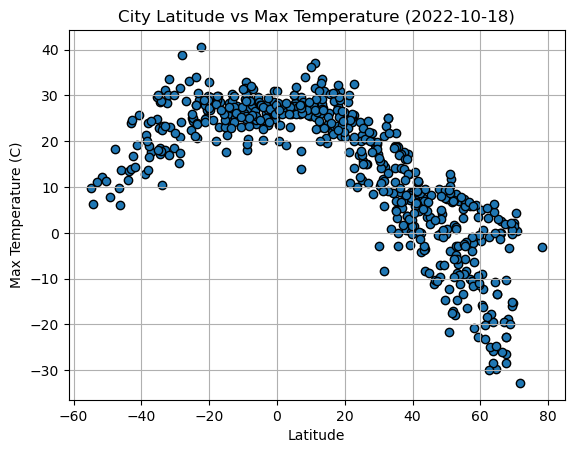

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o", edgecolors ="black")


# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

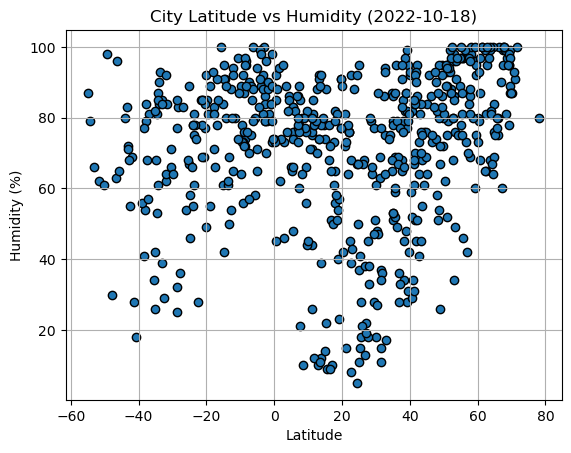

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ="o", edgecolors ="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

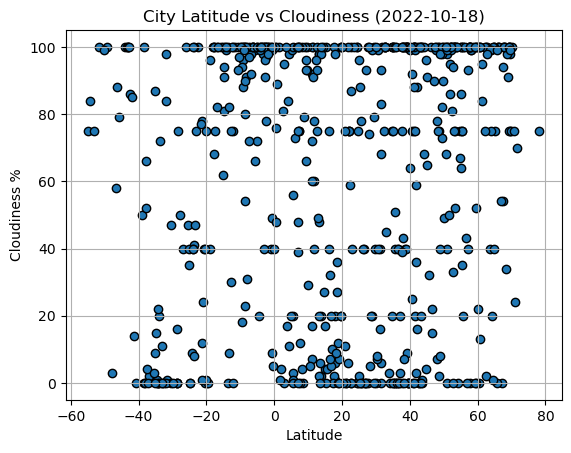

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ="o", edgecolors ="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

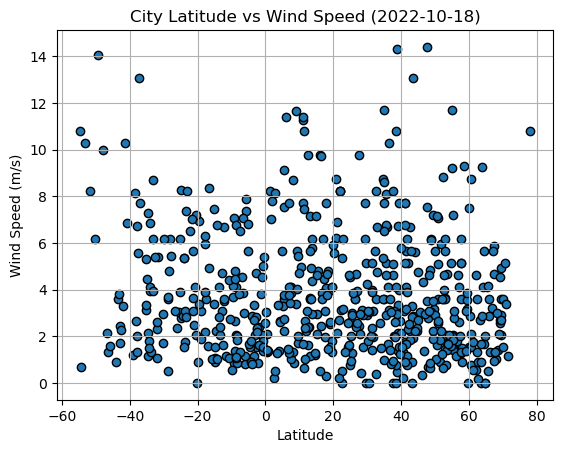

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ="o", edgecolors ="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values,y_values,x,y):
    
    (slope, intercept, rvalues, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print("The r-value is: " + str(rvalues))
    
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy =(x,y), fontsize = 15, color = "red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazovsky,67.4667,78.7000,-28.53,99,54,4.66,RU,1710013577
1,whitehorse,60.7161,-135.0538,0.61,68,100,8.75,CA,1710013470
2,coahuayana de hidalgo,18.7000,-103.6583,30.97,40,12,3.95,MX,1710013579
3,klyuchi,52.2667,79.1667,1.77,88,100,8.82,RU,1710013579
4,cove,7.2210,2.3402,29.56,60,100,3.85,BJ,1710013579


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,jayapura,-2.5333,140.7000,23.66,90,97,2.33,ID,1710013580
10,mount isa,-20.7333,139.5000,26.87,69,40,4.12,AU,1710013584
11,waitangi,-43.9535,-176.5597,11.57,80,100,0.89,NZ,1710013585
16,edinburgh of the seven seas,-37.0676,-12.3116,17.72,81,2,7.73,SH,1710013586
17,camiri,-20.0500,-63.5167,32.88,49,75,0.00,BO,1710013587


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8633100670885384


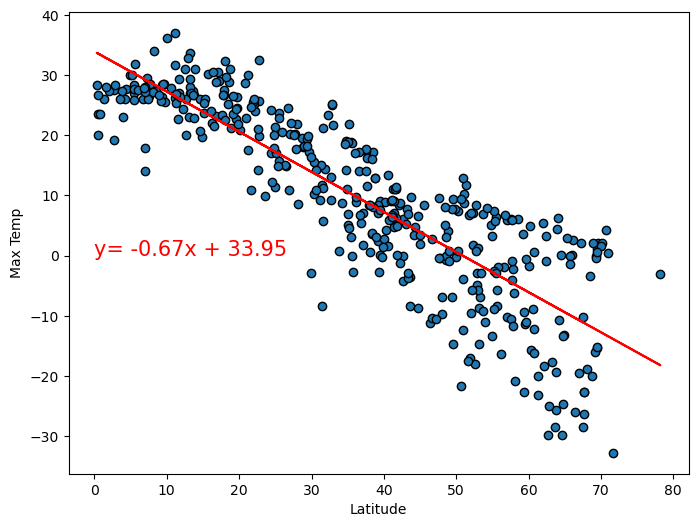

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize = (8,6))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 0, 0)


The r-value is: 0.5806367616506298


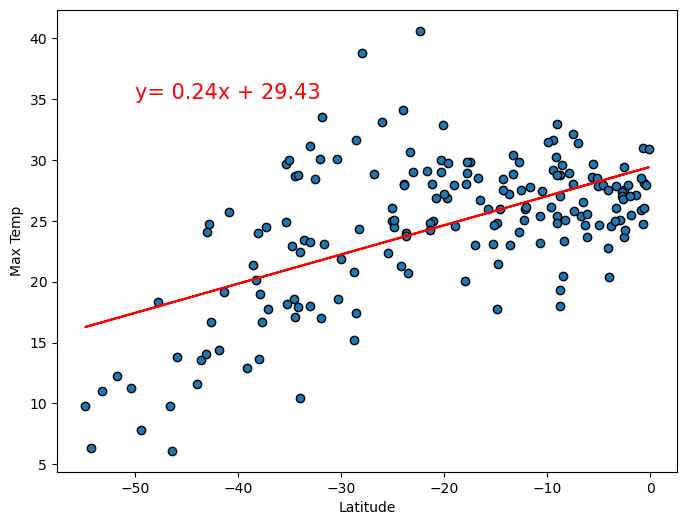

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.figure(figsize = (8,6))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -50, 35)


**Discussion about the linear relationship:** 

After looking at both scatter plots we can observe that there is a negative r value in the northern hemisphere and a positive r value in the southern hemisphere. We can see that the northern hemisphere has a strong negative linear relationship, meaning the higher the latitude, the lower the temperatrue drops. While in the southern hemisphere we can observe a not as strong positive linear relationship, meaning the lower the latitude is to 0 the likelier hotter the temperature gets.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.35681841189486435


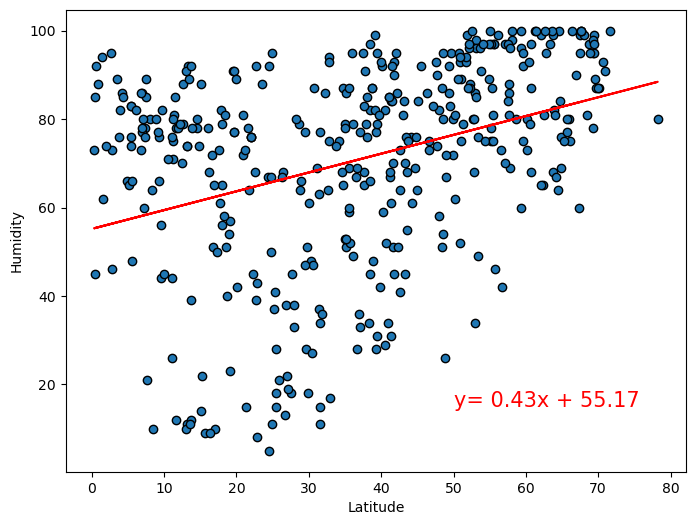

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(8,6))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, 50, 15)

The r-value is: 0.37850651685597647


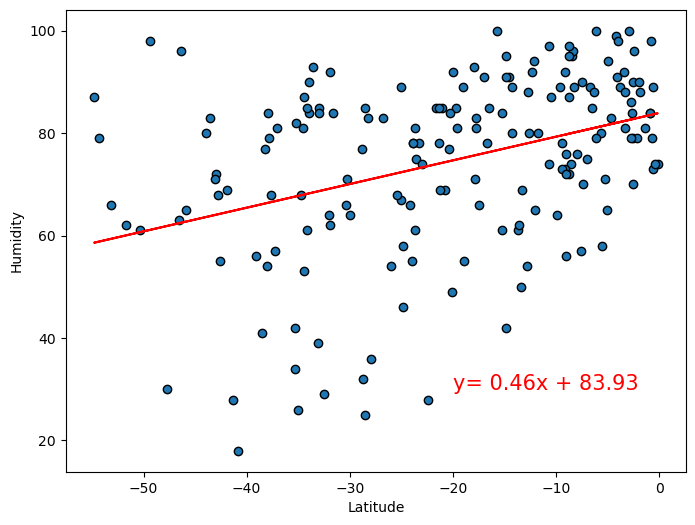

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(8,6))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -20, 30)

**Discussion about the linear relationship:**

After looking at both scatter plots we can observe that there is a positive r value in both the northern hemisphere and the southern hemisphere. Neither plots have as strong as a r value this time.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23665378510575083


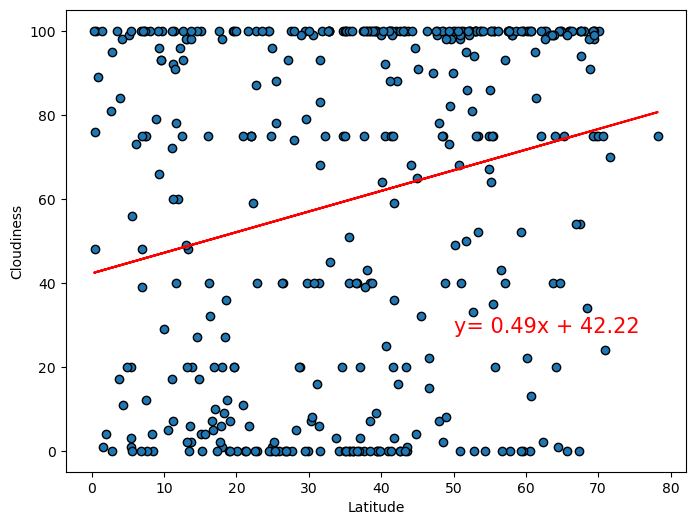

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plt.figure(figsize=(8,6))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 50, 28)


The r-value is: 0.35078986546455415


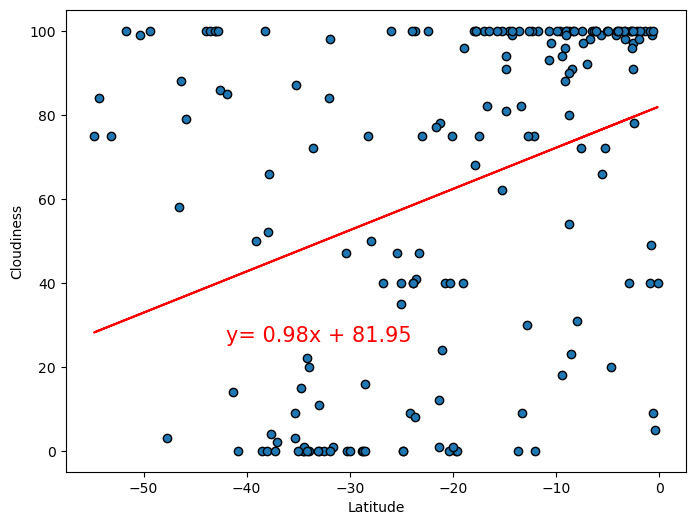

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plt.figure(figsize=(8,6))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -42, 26)

**Discussion about the linear relationship:** 
From reviewing these two scatter plots, we can see both hemispheres show a positive r value, the souther hemipshere having a stronger one at nearly double that of the northern hemisphere. We can conclude that there is no direct relationship between cloudiness and lattitude, as cloudiness increases the closer we get to 0 from the southern hemipshere  but it also increases as we get away from 0 in the norhtern hemisphere


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12698356012940035


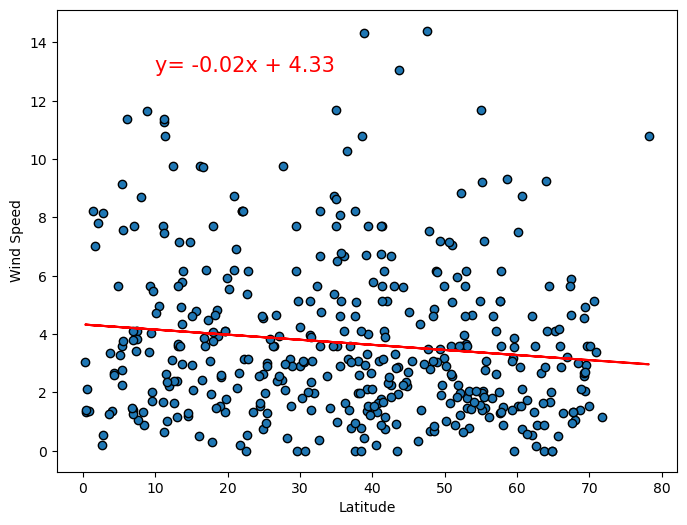

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plt.figure(figsize=(8,6))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 10, 13)

The r-value is: -0.3086121602744609


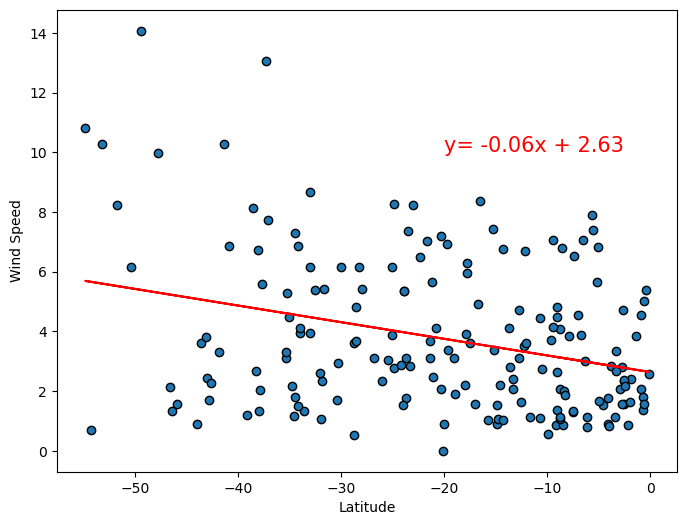

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


plt.figure(figsize=(8,6))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -20, 10)

**Discussion about the linear relationship:** 

Based on the two linear relationships we could conclude that; we see very weak negative R-value's for both hemispheres. We can colnculde that the wind speed does not vary significantly with the change in latitude.